## Projekt UMIP und SUVI


## Libaries and Settings

In [1]:
# Libraries
import os
import time
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import hashlib
import shutil

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC

# Libraries
import fnmatch
import urllib.request
from flickrapi import FlickrAPI
import matplotlib.image as mpimg

import openpyxl

import requests
from bs4 import BeautifulSoup
import urllib

import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model


# import some additional tools specifically for CNN

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, BatchNormalization

from apiclient.discovery import build

# Settings
import warnings
warnings.filterwarnings("ignore")

print("Libaries geladen")

2023-05-20 14:52:07.271939: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 14:52:07.383167: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 14:52:09.403888: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Libaries geladen


## SCRAP Datensatz Kaggle mittel API herunterladen

garbage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


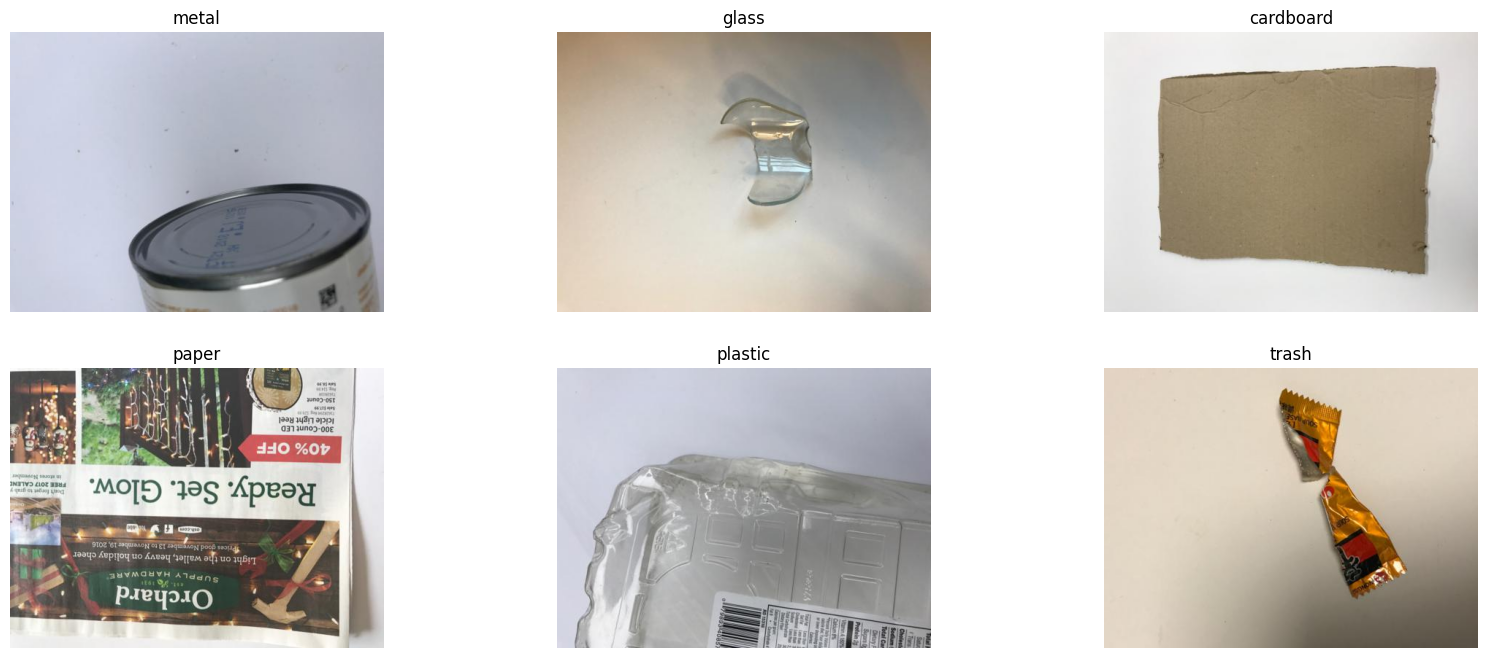

In [2]:
############################################################################################
#Datensatz von Kaggle laden mittels API

# Importieren Sie das Kaggle-Modul und geben Sie Ihren Benutzernamen und API-Token ein.
#!pip install kaggle
os.environ['philip'] = 'Ihr Kaggle-Benutzername'
os.environ['xxxxxxxxxxxxxxxxxxxxxxx'] = 'Ihr Kaggle-API-Token'

# Laden Sie den Datensatz herunter und extrahieren Sie ihn.
!kaggle datasets download -d asdasdasasdas/garbage-classification
with zipfile.ZipFile('garbage-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('garbage_classification')
    

# Pfad zum Ordner mit den Testbildern
folder_path = 'garbage_classification/Garbage classification/Garbage classification'

# Liste aller Unterordner im Ordner
subfolders = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Anzahl der Bilder, die in einer Reihe dargestellt werden sollen
images_per_row = 3

# Anzahl der Reihen, die benötigt werden
num_rows = (len(subfolders) - 1) // images_per_row + 1

# Erstelle eine neue Figur
plt.figure(figsize=(20, num_rows * 4))

# Iteriere über alle Unterordner und lade das erste Bild aus jedem Unterordner
for i, subfolder in enumerate(subfolders):
    # Liste aller Bilddateien im Unterordner
    image_files = [os.path.join(subfolder, f) for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f)) and f.endswith('.jpg')]
    
    # Lade das erste Bild im Unterordner mit PIL
    if image_files:
        image = Image.open(image_files[0])
    else:
        continue
    
    # Füge das Bild zur aktuellen Figur hinzu
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(os.path.basename(subfolder))  # Beschriftung mit dem Namen des Unterordners

# Zeige die Figur an
plt.show()

## SCRAP von Wikipedia mit Chrome Driver

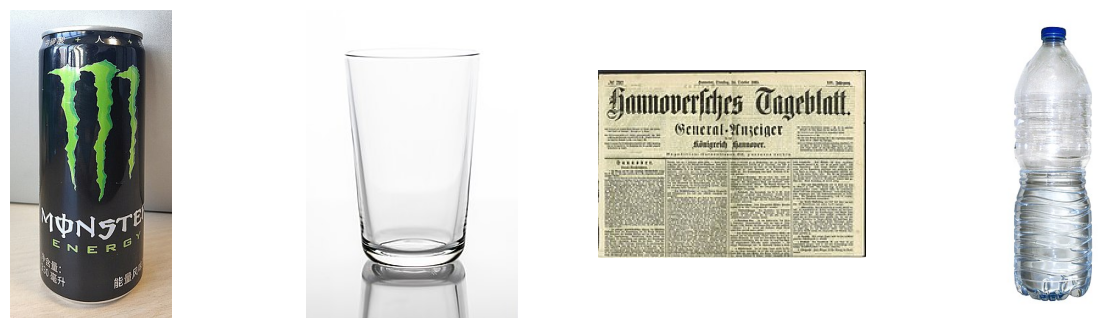

In [3]:
folder_name = "Testbilder_wiki"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

dictcc =["PET-Flasche","Trinkglas","Zeitung","Monster Energy"]

for a in dictcc:

    #print(a)
    # Liste mit User-Agents für Rotation (Quelle: https://techblog.willshouse.com/2012/01/03/most-common-user-agents
    # Liste mit User-Agents für Rotation (Quelle: https://techblog.willshouse.com/2012/01/03/most-common-user-agents)
    ua_path = "./static/user_agents.txt"
    ua_list = [line.rstrip('\n') for line in open(ua_path)]
    ua_list[:5]

    opts = Options()
    opts.add_argument("--headless")
    opts.add_argument("user-agent=" + random.choice(ua_list))
    opts.add_argument("--no-sandbox");
    opts.add_argument("--disable-dev-shm-usage"); 
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=opts)

    # Set filename variable
    filename_prefix = a

    # Website to scrape
    driver.get('https://de.wikipedia.org/wiki/Wikipedia:Hauptseite')

    # Fill in the search text
    text_to_send = a
    element = driver.find_element(By.XPATH, '/html/body/div[4]/div[1]/div[2]/div/div/form/div/input[1]')
    element.send_keys(text_to_send)

    # Submit search text
    element.submit()

    # Wait until the website is showing up
    time.sleep(5)

    #f#ilename = f'{filename_prefix}.jpg'
    filename = os.path.join(folder_name, f'{filename_prefix}.jpg')
    # Find the image on the page
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    img_tag = soup.find('img', {'class': 'thumbimage'})
    img_path = img_tag['src']
    img_url = "https:" + img_path
    urllib.request.urlretrieve(img_url, filename)

    # Close driver
    driver.quit()

# Pfad zum Ordner mit den Testbildern
folder_path = 'Testbilder_wiki'

# Liste aller Bilddateien im Ordner
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]

# Anzahl der Bilder, die in einer Reihe dargestellt werden sollen
images_per_row = 5

# Anzahl der Reihen, die benötigt werden
num_rows = (len(image_files) - 1) // images_per_row + 1

# Erstelle eine neue Figur
plt.figure(figsize=(20, num_rows * 4))

# Iteriere über alle Bilder
for i, image_file in enumerate(image_files):
    # Lade das Bild mit PIL
    image = Image.open(image_file)
    
    # Füge das Bild zur aktuellen Figur hinzu
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Zeige die Figur an
plt.show()

## Scrap weiterer Test-Bilder - Flicker API & Google API

Alle Bilder wurden erfolgreich heruntergeladen und im Ordner 'Testbilder' gespeichert.


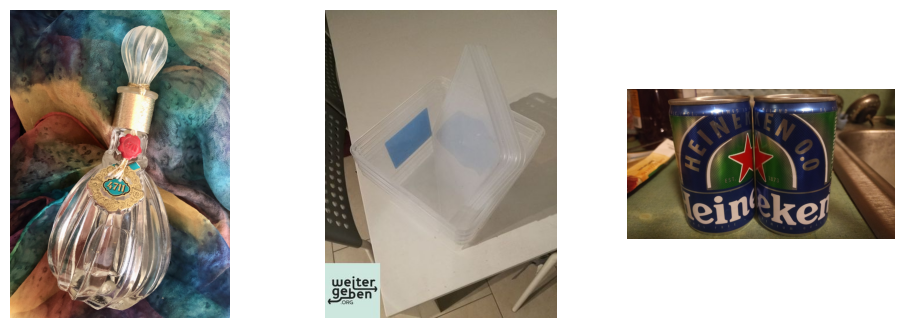

In [4]:
# Keys for flickr API
FLICKR_PUBLIC = 'xxxxxxxxxxxxxxxxxxxxxxxx'
FLICKR_SECRET = 'xxxxxxxxxxx'

# Settings (extras = different resolution of photos)
flickr = FlickrAPI(FLICKR_PUBLIC, FLICKR_SECRET, format='parsed-json')
extras = 'url_sq,url_t,url_s,url_q,url_m,url_n,url_z,url_c,url_l,url_o'

# Get information about photos using the flickr API

folder_name = "Testbilder_flicker"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

schleife = ["glasflasche", "Plastikbehälter", "Heineken-Can"]

# Flickr-API aufrufen für alle Schleifenwerte
for a in schleife:
    # Flickr-API aufrufen
    cont = flickr.photos.search(text=a, per_page=2, extras=extras)
    photos = cont['photos']

    # Annahme: Die "photos" Liste enthält mindestens 2 Fotos
    for i in range(1):
        photo = photos["photo"][i]
        try:
            # Download einzelnes Foto
            filename = os.path.join(folder_name, f"{a}_{i}.jpg")
            url = photo['url_o']
            urllib.request.urlretrieve(url, filename)
        except:
            print(photo)

# Erfolgsmeldung anzeigen
print("Alle Bilder wurden erfolgreich heruntergeladen und im Ordner 'Testbilder' gespeichert.")

# Pfad zum Ordner mit den Testbildern
folder_path = "Testbilder_flicker"

# Liste aller Bilddateien im Ordner
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]

# Anzahl der Bilder, die in einer Reihe dargestellt werden sollen
images_per_row = 5

# Anzahl der Reihen, die benötigt werden
num_rows = (len(image_files) - 1) // images_per_row + 1

# Erstelle eine neue Figur
plt.figure(figsize=(20, num_rows * 4))

# Iteriere über alle Bilder
for i, image_file in enumerate(image_files):
    # Lade das Bild mit PIL
    image = Image.open(image_file)
    
    # Füge das Bild zur aktuellen Figur hinzu
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Zeige die Figur an
plt.show()

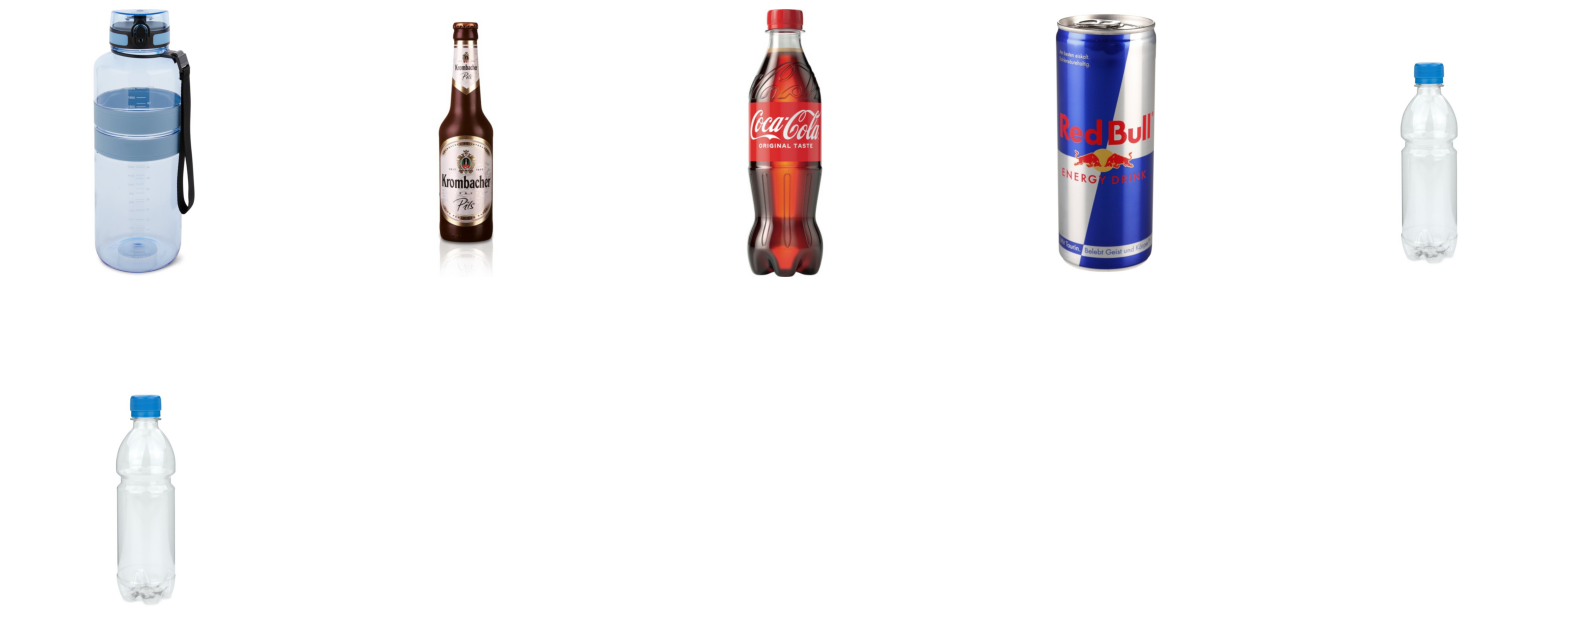

In [5]:
# Google API
api_key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
cx = 'xxxxxxxxxxxxxxxxxxxx'
search_queries = ["Bierflascher", "Pet-Flasche", "Redbulldose","coca-colaflasche",'Tavola Trinkflasche']  # Liste der Suchbegriffe
num_images = 1  # Anzahl der Bilder pro Suchbegriff
download_directory = "Bilder_APi_google"  # Verzeichnis zum Speichern der heruntergeladenen Bilder

# Stellen Sie sicher, dass das Download-Verzeichnis vorhanden ist
os.makedirs(download_directory, exist_ok=True)

resource = build("customsearch", "v1", developerKey=api_key)

for query in search_queries:
    result = resource.cse().list(q=query, cx=cx, searchType="image", num=num_images).execute()

    # Durchlaufen Sie die Suchergebnisse und laden Sie die Bilder herunter
    for i, item in enumerate(result["items"]):
        image_url = item["link"]
        response = requests.get(image_url)
        image_data = response.content

        # Speichern Sie das Bild auf der Festplatte
        image_path = os.path.join(download_directory, f"{query}_image_{i+1}.jpg")
        with open(image_path, "wb") as f:
            f.write(image_data)

        #print(f"Bild {i+1} für Suchbegriff '{query}' heruntergeladen und gespeichert unter: {image_path}")

# Pfad zum Ordner mit den Testbildern
folder_path = download_directory

# Liste aller Bilddateien im Ordner
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]

# Anzahl der Bilder, die in einer Reihe dargestellt werden sollen
images_per_row = 5

# Anzahl der Reihen, die benötigt werden
num_rows = (len(image_files) - 1) // images_per_row + 1

# Erstelle eine neue Figur
plt.figure(figsize=(20, num_rows * 4))

# Iteriere über alle Bilder
for i, image_file in enumerate(image_files):
    # Lade das Bild mit PIL
    image = Image.open(image_file)
    
    # Füge das Bild zur aktuellen Figur hinzu
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Zeige die Figur an
plt.show()

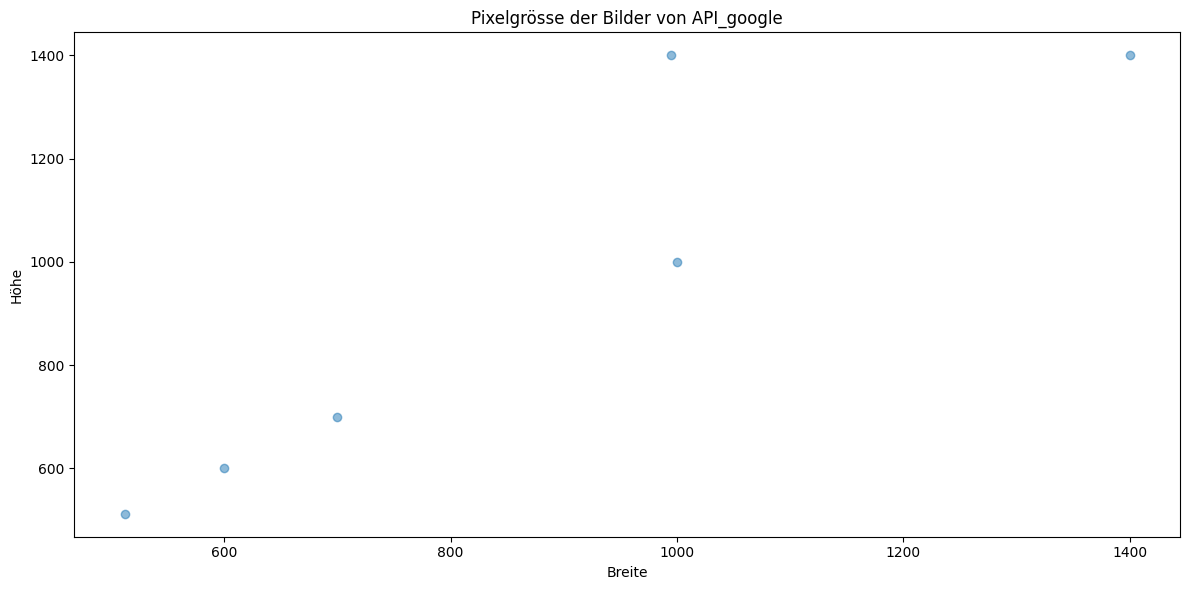

In [6]:
# Ordnerpfad mit allen Bildern
folder_path = 'Bilder_APi_google'

# Arrays für Größen der Bilder
image_sizes = []

# Schleife durch alle Bilder im Ordner
for filename in os.listdir(folder_path):
    # Bild laden und Größe erfassen
    img = Image.open(os.path.join(folder_path, filename))
    image_sizes.append(img.size)

# Figur erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Scatterplot der Bildgrößen erstellen
x_values = [size[0] for size in image_sizes]  # Breite
y_values = [size[1] for size in image_sizes]  # Höhe
ax.scatter(x_values, y_values, marker='o', alpha=0.5)
ax.set_xlabel('Breite')
ax.set_ylabel('Höhe')
ax.set_title('Pixelgrösse der Bilder von API_google')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


## Umschrieben der Bildergrösse

In [7]:
def erweitere_breite_bild(bild, neue_breite):
    aktuelle_breite, hoehe = bild.size
    linker_rand = (neue_breite - aktuelle_breite) // 2
    rechter_rand = neue_breite - aktuelle_breite - linker_rand

    neues_bild = Image.new("RGB", (neue_breite, hoehe), (255, 255, 255))  # Weißer Hintergrund
    neues_bild.paste(bild, (linker_rand, 0))

    return neues_bild

# Path to the directory containing the images
image_directory = "./Bilder_APi_google/"

# Iterate over the files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):
        # Open the image
        v = Image.open(os.path.join(image_directory, filename))
        
        alte_breite, alte_hoehe = v.size
        print(f"Alte Breite: {alte_breite}")
        print(f"Alte Höhe: {alte_hoehe}")

        if alte_hoehe > alte_breite:
            neue_breite = alte_hoehe
            print(f"Neue Breite: {neue_breite}")
        
            neues_bild = erweitere_breite_bild(v, neue_breite)
            neues_bild.save(os.path.join(image_directory, "ergebnis_" + filename))
            
            # Delete the original image
            os.remove(os.path.join(image_directory, filename))

Alte Breite: 1000
Alte Höhe: 1000
Alte Breite: 700
Alte Höhe: 700
Alte Breite: 512
Alte Höhe: 512
Alte Breite: 600
Alte Höhe: 600
Alte Breite: 1400
Alte Höhe: 1400
Alte Breite: 995
Alte Höhe: 1400
Neue Breite: 1400


## Building Image Dataset - lokaler Ordner PC

In [8]:
### Imagedatensatz laden
class_names_auswahl_möglichkeiten= ["cardboard","glass","metal","paper","plastic","trash"]
if os.path.exists('./Daten_image_set_finally'):
    shutil.rmtree('./Daten_image_set_finally')
    
# Neuer Name des Zielordners
destination_folder = './Daten_image_set_finally'


###################
#Datensatz laden mit nur gewissen Klassen. Angeben welche Klasse 
class_names_laden= ["cardboard","glass","metal","paper","plastic"]
path = 'garbage_classification/Garbage classification/Garbage classification'
list1=[]
elementlist=[]
for element in os.listdir(path):
    #print(element)
    elementlist.append(element)
    #print(elementlist)
    
for x in class_names_laden:
    print(x)
    if x in elementlist:
        full_path = os.path.join(path,x)
        list1.append(full_path)
    #print(list1)

# Kopieren Sie jeden Ordner in den Zielordner
for folder_path in list1:
    folder_name = os.path.basename(folder_path)
    destination_path = os.path.join(destination_folder, folder_name)
    shutil.copytree(folder_path, destination_path)

print("Selected folders copied to destination folder!")

cardboard
glass
metal
paper
plastic
Selected folders copied to destination folder!


## Datenaufbereitung Duplikate erkennen Hash

Doppelte Dateien mit dem Hash 81546d1362d75fc60718e5852593c58f66f813e8c1e9d1eae6871fedb02e2868:
- ./Daten_image_set_finally/metal/metal91.jpg
- ./Daten_image_set_finally/glass/glass115.jpg
Doppelte Dateien mit dem Hash c41b99aec8a3257c8668a2144ebbaf8042018f0a85d88e22bf4e413b43693dd8:
- ./Daten_image_set_finally/glass/glass176.jpg
- ./Daten_image_set_finally/plastic/plastic152.jpg
Doppelte Dateien mit dem Hash e971f4f8f50e960e454ea724cec922fc2988bbf4027aa48b553e139bb5890968:
- ./Daten_image_set_finally/glass/glass389.jpg
- ./Daten_image_set_finally/plastic/plastic332.jpg


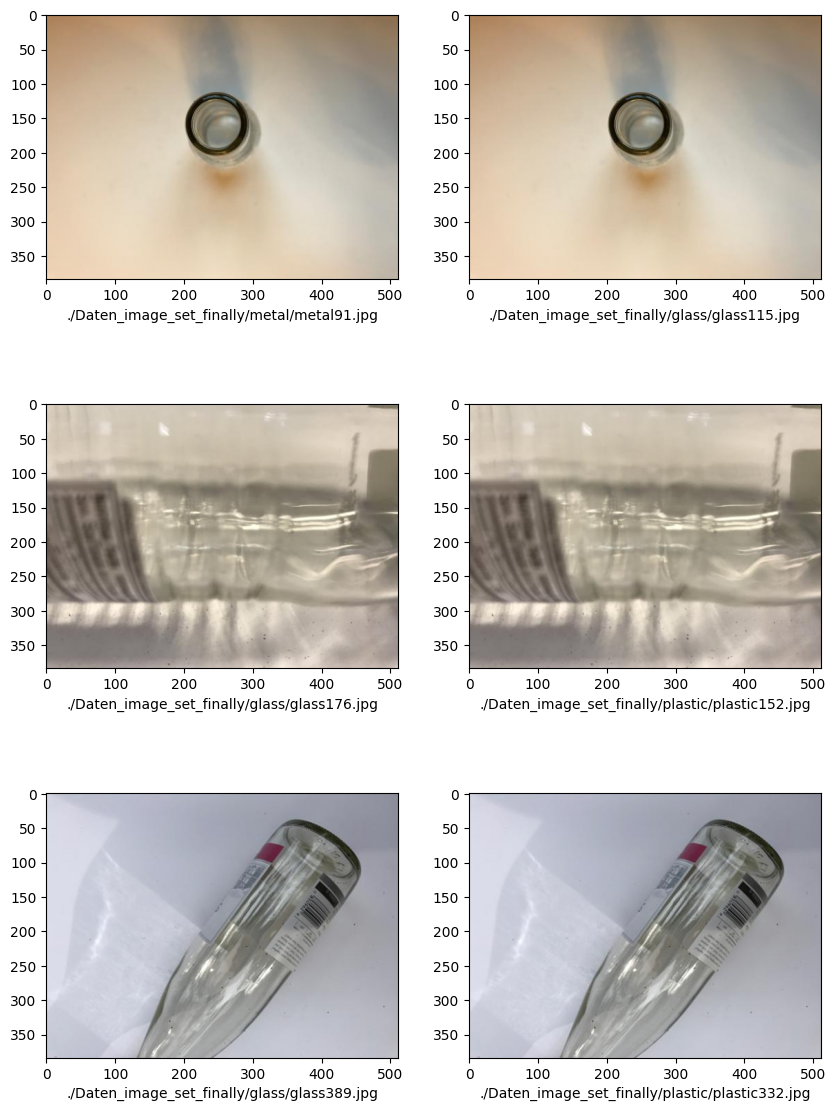

In [9]:
# Pfad zum Hauptordner
root_folder = './Daten_image_set_finally'

# Funktion, um alle Dateien in einem Ordner und seinen Unterordnern zu finden
def find_files(folder):
    for dirpath, dirnames, filenames in os.walk(folder):
        for filename in filenames:
            yield os.path.join(dirpath, filename)

# Dictionary, um die Hashes der Dateien zu speichern
hashes = {}

# Durchsuchen aller Dateien in den Unterordnern
for file_path in find_files(root_folder):
    # Öffnen der Datei als Bytes
    with open(file_path, 'rb') as file:
        # Berechnen des Hashes der Datei
        file_hash = hashlib.sha256(file.read()).hexdigest()

        # Hinzufügen des Hashes zur Liste der bereits gefundenen Hashes
        if file_hash in hashes:
            hashes[file_hash].append(file_path)
        else:
            hashes[file_hash] = [file_path]
path_rgb_test = []
#print(hashes)
# Ausgabe der doppelten Dateien
for file_hash, file_paths in hashes.items():
    if len(file_paths) > 1:
        print(f'Doppelte Dateien mit dem Hash {file_hash}:')
        for file_path in file_paths:
            print(f'- {file_path}')
            path_rgb_test.append(file_path)
#print("Finish")
#print(path_rgb_test)

# Erstellen des Plots
fig, axs = plt.subplots(nrows=len(path_rgb_test)//2, ncols=2, figsize=(10, 14))

# Iterieren über alle Dateien in path_rgb_test und Anzeigen der Bilder
for i, file_path in enumerate(path_rgb_test):
    row = i // 2
    col = i % 2
    image = Image.open(file_path)
    axs[row, col].imshow(image)
    axs[row, col].set_xlabel(file_path)

# Einstellen des vertikalen Abstands zwischen den Subplots
fig.subplots_adjust(hspace=0.3)

# Anzeigen des Plots
plt.show()

## Bilder in die Datenbank schreiben

In [10]:
import mysql.connector
import os

# Verbindung zur MySQL-Datenbank herstellen
mydb =  mysql.connector.connect(user='root', password='xxxxxxxxxxxxx',
                               host='mysql',
                              database='bilderkennung')

# Cursor-Objekt erstellen
mycursor = mydb.cursor()

# Ordnername angeben
folder = './Daten_image_set_finally'

# Schleife durch alle Ordner im Verzeichnis
for entry in os.scandir(folder):
    if entry.is_dir():
        # Tabellenname entspricht dem Namen des Ordners
        table_name = entry.name
        # SQL-Abfrage zum Erstellen der Tabelle
        create_table_query = f"CREATE TABLE IF NOT EXISTS `{table_name}` (id INT AUTO_INCREMENT PRIMARY KEY, image_name VARCHAR(255) NOT NULL, image_data LONGBLOB NOT NULL)"
        mycursor.execute(create_table_query)

        # Schleife durch alle Dateien im Unterordner
        for file_entry in os.scandir(entry.path):
            if file_entry.is_file() and (file_entry.name.endswith(".jpg") or file_entry.name.endswith(".png")):
                # SQL-Abfrage zum Einfügen des Bildes in die Datenbank
                insert_query = f"INSERT INTO `{table_name}` (image_name, image_data) VALUES (%s, %s)"
                with open(file_entry.path, 'rb') as f:
                    mycursor.execute(insert_query, (file_entry.name, f.read()))

# Änderungen in der Datenbank speichern
mydb.commit()

# Verbindung schließen
mycursor.close()
mydb.close()


print("no error")

no error


## Bilder aus der Datenbank extrahieren

In [11]:
# Verbindung zur MySQL-Datenbank herstellen
import mysql.connector
import os

# Verbindung zur MySQL-Datenbank herstellen
mydb =  mysql.connector.connect(user='root', password='xxxxxxxxxxxxxxxxxxx',
                               host='mysql',
                              database='bilderkennung')

# Cursor-Objekt erstellen
mycursor = mydb.cursor()

# Ordnername für die gespeicherten Bilder angeben
output_folder = "./Final_Set_SQL"


# SQL-Abfrage zum Abrufen der Tabellennamen
mycursor.execute("SHOW TABLES")
tables = mycursor.fetchall()

# Schleife durch alle Tabellen
for table in tables:
    table_name = table[0]
    # Ordner für die Tabelle erstellen
    table_folder = os.path.join(output_folder, table_name)
    if not os.path.exists(table_folder):
        os.makedirs(table_folder)

    # SQL-Abfrage zum Abrufen der Bilddaten
    mycursor.execute(f"SELECT image_name, image_data FROM `{table_name}`")
    images = mycursor.fetchall()

    # Schleife durch alle Bilder und speichern im entsprechenden Ordner
    for image in images:
        image_name = image[0]
        image_data = image[1]
        image_path = os.path.join(table_folder, image_name)
        with open(image_path, 'wb') as f:
            f.write(image_data)

# Verbindung schließen
mycursor.close()
mydb.close()

print("no Error")

no Error


## EDA Analyse der Bilder

Klasse: metal, RGB-Mittelwert: [151.89657167 157.00576075 164.82827208]
Klasse: glass, RGB-Mittelwert: [163.09804727 170.51842232 176.37537536]
Klasse: cardboard, RGB-Mittelwert: [127.93128957 148.85700061 170.08026354]
Klasse: paper, RGB-Mittelwert: [155.4314591  164.55118311 172.18114987]
Klasse: plastic, RGB-Mittelwert: [168.97854035 170.0917927  171.08491776]


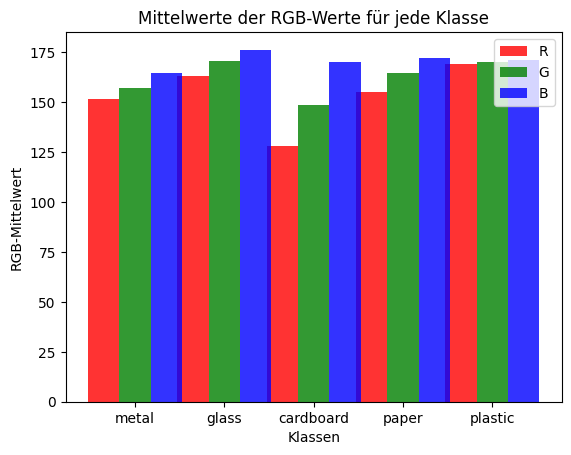

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ordnerpfad für alle Bilder
folder_path = './Daten_image_set_finally'

# Eine Liste aller Unterordner in folder_path
class_names = os.listdir(folder_path)

# Liste für Mittelwerte der RGB-Werte
rgb_means = []

# Schleife durch alle Klassen
for class_name in class_names:
    
    # Ordnerpfad für jede Klasse
    class_path = os.path.join(folder_path, class_name)
    
    # Liste aller Bilder in der Klasse
    images = os.listdir(class_path)
    
    # Schleife durch alle Bilder in der Klasse
    class_pixels = []
    for image_name in images:
        
        # Bildpfad
        image_path = os.path.join(class_path, image_name)
        
        # Bild laden
        image = cv2.imread(image_path)
        
        # Pixel extrahieren und zur Liste hinzufügen
        pixels = np.reshape(image, (-1, 3))
        class_pixels.append(pixels)
        
    # Mittelwert der RGB-Werte für die Klasse berechnen
    class_mean = np.mean(np.concatenate(class_pixels, axis=0), axis=0)
    
    # Mittelwert der RGB-Werte zur Liste hinzufügen
    rgb_means.append(class_mean)
    
    # Ausgabe des Klassennamens und des Mittelwerts der RGB-Werte
    print(f"Klasse: {class_name}, RGB-Mittelwert: {class_mean}")

# Balkendiagramm der Mittelwerte der RGB-Werte für jede Klasse erstellen
fig, ax = plt.subplots()
x_pos = np.arange(len(class_names))
bar_width = 0.35
opacity = 0.8

# Balkendiagramme für R-, G- und B-Werte erstellen
rects1 = ax.bar(x_pos, [mean[0] for mean in rgb_means], bar_width,
                alpha=opacity, color='r', label='R')
rects2 = ax.bar(x_pos + bar_width, [mean[1] for mean in rgb_means], bar_width,
                alpha=opacity, color='g', label='G')
rects3 = ax.bar(x_pos + 2*bar_width, [mean[2] for mean in rgb_means], bar_width,
                alpha=opacity, color='b', label='B')

# Achsenbeschriftungen und Titel hinzufügen
ax.set_xlabel('Klassen')
ax.set_ylabel('RGB-Mittelwert')
ax.set_title('Mittelwerte der RGB-Werte für jede Klasse')
ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(class_names)
ax.legend()

# Diagramm anzeigen
plt.show()


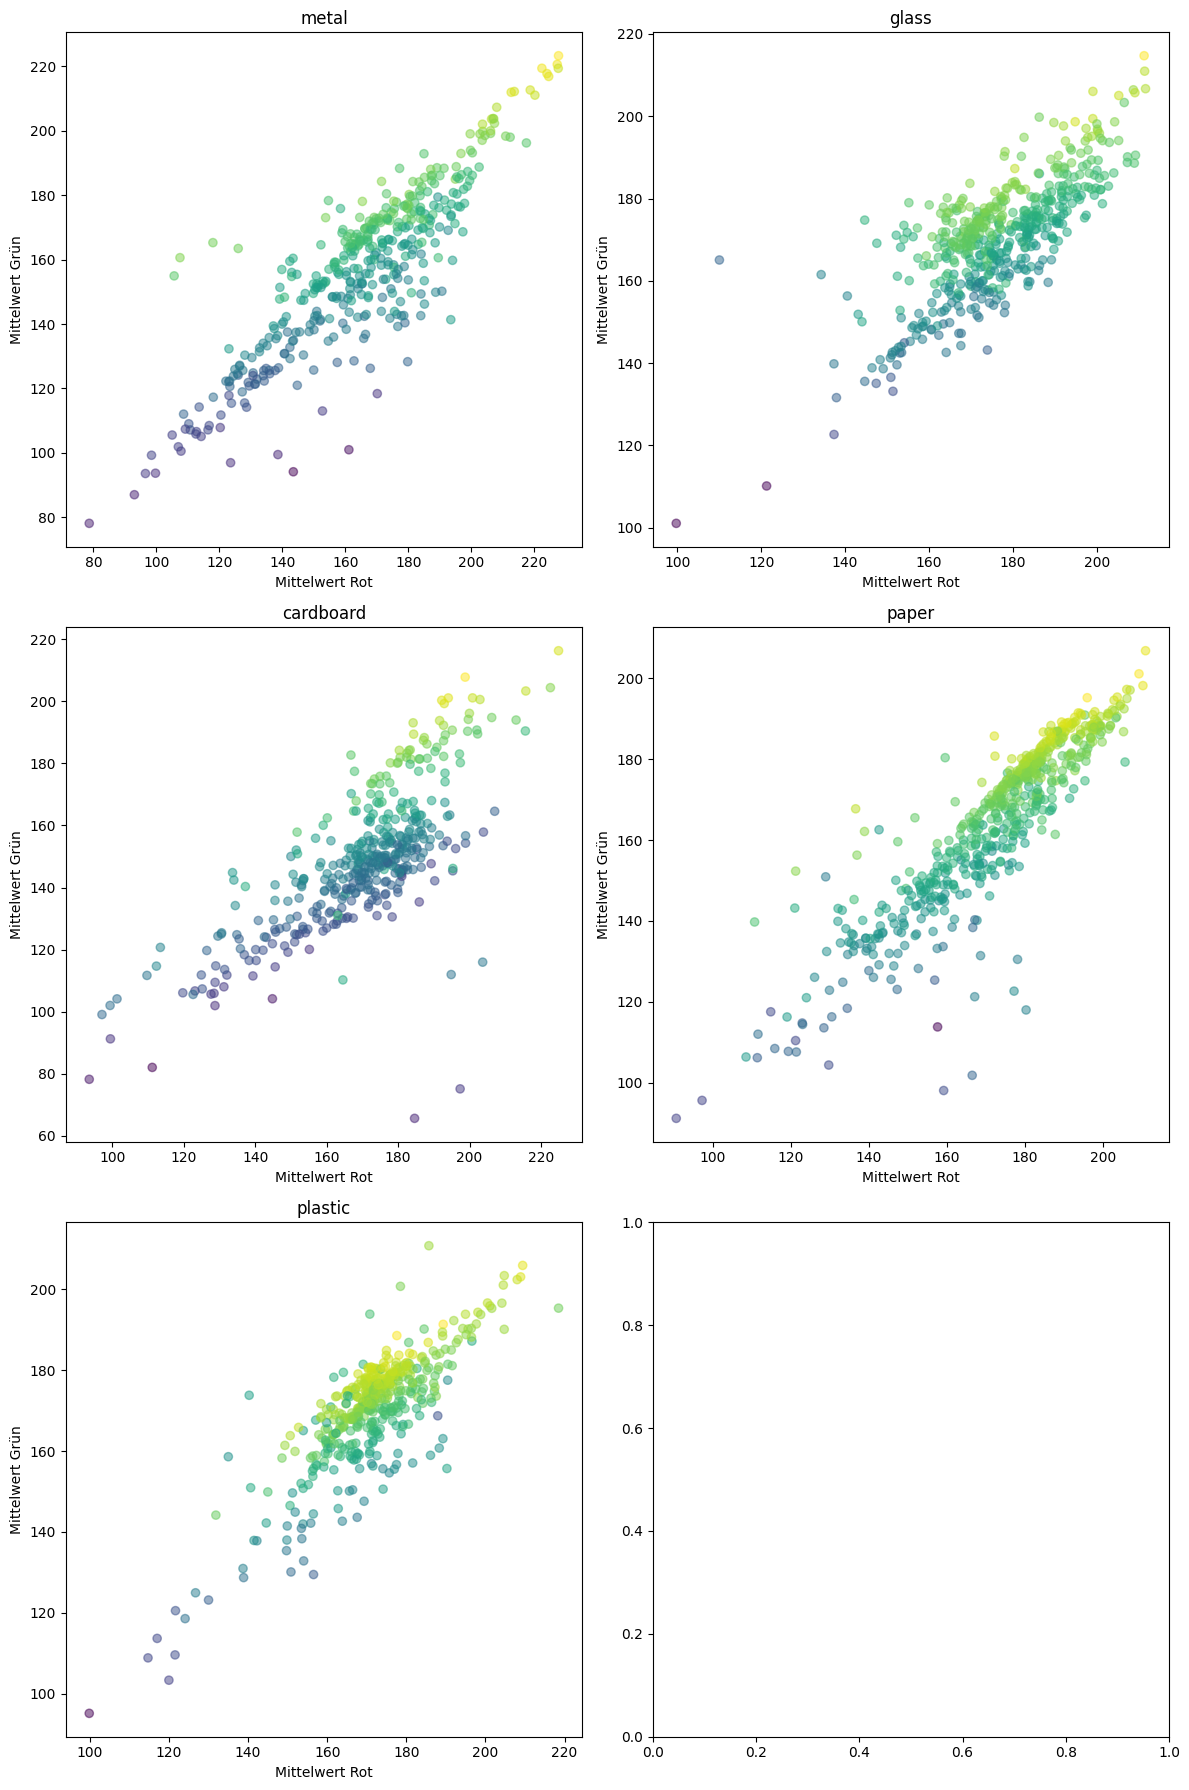

In [13]:
#Nein, die x- und y-Werte im Scatterplot stehen für die Mittelwerte der Rot- und 
#Grünkanäle der jeweiligen Bilder. Die Farbe jedes Punktes wird durch den Mittelwert des 
#Blaukanals dargestellt, der auf den Bereich von 0 bis 1 skaliert wurde, um eine korrekte 
#Darstellung zu ermöglichen. Das bedeutet nicht, dass der Blaukanal selbst wie eine Farbe im Scatterplot abgelesen werden
#kann, sondern dass die Farbe jedes Punktes im Scatterplot durch den Wert des skalierten Blaukanals repräsentiert wird.

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Ordnerpfad mit allen Ordnern der Bilder
folder_path = './Daten_image_set_finally/'

# Anzahl der Subplots und Anzahl der Zeilen
num_subplots = len(os.listdir(folder_path))
num_rows = int(np.ceil(num_subplots / 2))

# Figur und Subplots erstellen
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

# Schleife durch alle Ordner im Hauptordner
for idx, foldername in enumerate(os.listdir(folder_path)):
    # Ordnerpfad mit Bildern
    folder_path_images = os.path.join(folder_path, foldername)

    # Arrays für Mittelwerte der RGB-Kanäle
    mean_red = []
    mean_green = []
    mean_blue = []

    # Schleife durch alle Bilder im Ordner
    for filename in os.listdir(folder_path_images):
        # Bild laden und in ein NumPy-Array umwandeln
        img = Image.open(os.path.join(folder_path_images, filename))
        img_arr = np.array(img)

        # Mittelwerte der RGB-Kanäle berechnen und speichern
        mean_red.append(np.mean(img_arr[:,:,0]))
        mean_green.append(np.mean(img_arr[:,:,1]))
        mean_blue.append(np.mean(img_arr[:,:,2]))

    # Scatterplot der Mittelwerte erstellen
    row_idx = idx // 2
    col_idx = idx % 2
    axs[row_idx, col_idx].scatter(mean_red, mean_green, c=np.array(mean_blue)/255.0, alpha=0.5)
    axs[row_idx, col_idx].set_xlabel('Mittelwert Rot')
    axs[row_idx, col_idx].set_ylabel('Mittelwert Grün')
    axs[row_idx, col_idx].set_title(foldername) # Ordnername als Titel

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()





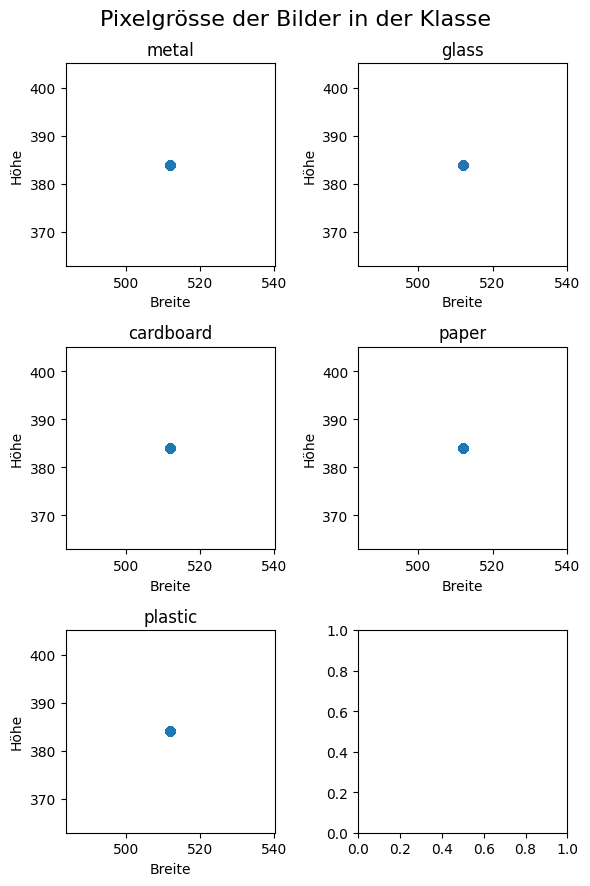

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Ordnerpfad mit allen Ordnern der Bilder
folder_path = './Daten_image_set_finally/'

# Anzahl der Subplots und Anzahl der Zeilen
num_subplots = len(os.listdir(folder_path))
num_rows = int(np.ceil(num_subplots / 2))

# Figur und Subplots erstellen
fig, axs = plt.subplots(num_rows, 2, figsize=(6, 3*num_rows))

# Schleife durch alle Ordner im Hauptordner
for idx, foldername in enumerate(os.listdir(folder_path)):
    # Ordnerpfad mit Bildern
    folder_path_images = os.path.join(folder_path, foldername)

    # Arrays für Größen der Bilder
    image_sizes = []

    # Schleife durch alle Bilder im Ordner
    for filename in os.listdir(folder_path_images):
        # Bild laden und Größe erfassen
        img = Image.open(os.path.join(folder_path_images, filename))
        image_sizes.append(img.size)

    # Scatterplot der Bildgrößen erstellen
    row_idx = idx // 2
    col_idx = idx % 2
    x_values = [size[0] for size in image_sizes]  # Breite
    y_values = [size[1] for size in image_sizes]  # Höhe
    axs[row_idx, col_idx].scatter(x_values, y_values, marker='o', alpha=0.5)
    axs[row_idx, col_idx].set_xlabel('Breite')
    axs[row_idx, col_idx].set_ylabel('Höhe')
    axs[row_idx, col_idx].set_title(foldername)  # Titel mit Ordnername

        
    # Titel über allen Subplots hinzufügen
    fig.suptitle('Pixelgrösse der Bilder in der Klasse', fontsize=16)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


Found 2390 files belonging to 5 classes.
['cardboard', 'glass', 'metal', 'paper', 'plastic']
5


2023-05-20 14:54:15.323507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2390]
	 [[{{node Placeholder/_4}}]]
2023-05-20 14:54:15.324396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2390]
	 [[{{node Placeholder/_4}}]]


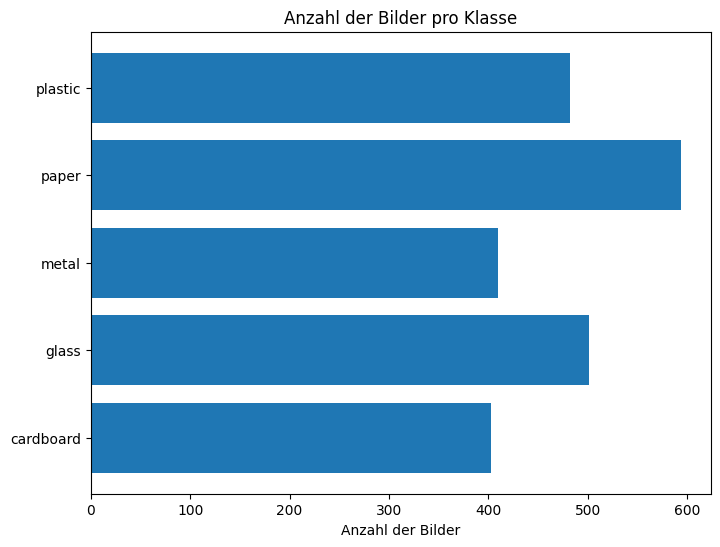

In [15]:
### Imagedatensatz laden
dir_='./Daten_image_set_finally'

###################
# Laden Sie die Trainingsdaten als TensorFlow-Dataset.
Image_data_set = tf.keras.preprocessing.image_dataset_from_directory(
    dir_,
    labels='inferred',
    image_size=(20, 20),
    shuffle=True
)

#überprüfen wie wviele Klassen und wie viele Bilder pro Klasse
# Zähle die Anzahl der Klassen und die Anzahl der Bilder pro Klasse
class_names = Image_data_set.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)
num_images = [0] * num_classes

for images, labels in Image_data_set:
    for label in labels:
        num_images[label] += 1

# Erstelle den Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(class_names, num_images)
ax.set_xlabel('Anzahl der Bilder')
ax.set_title('Anzahl der Bilder pro Klasse')

plt.show()


#if os.path.exists('Daten_image_set'):
 #   shutil.rmtree('Daten_image_set')

## Split the data into training and testing sets Tenserflow Datensatz bilden

In [16]:
###################
# Laden Sie die Trainingsdaten als TensorFlow-Dataset.
Image_data_set = tf.keras.preprocessing.image_dataset_from_directory(
    './Daten_image_set_finally',
    labels='inferred',
    image_size=(300, 300),
    shuffle=True
)


from sklearn.model_selection import train_test_split 
images = []
labels = []
for image, label in Image_data_set.as_numpy_iterator():
    images.append(image)
    labels.append(label)
images = np.vstack(images)
labels = np.concatenate(labels)
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


X_train = X_train.reshape(-1, 300, 300, 3)
X_test = X_test.reshape(-1, 300, 300, 3)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train / 255.0
X_test = X_test / 255.0


#one hot fromat classes
import os

path = './Daten_image_set_finally'
nb_classes = len([name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))])
print(nb_classes)

#nb_classes = 6 
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Found 2390 files belonging to 5 classes.


2023-05-20 14:54:18.301624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2390]
	 [[{{node Placeholder/_4}}]]
2023-05-20 14:54:18.302391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2390]
	 [[{{node Placeholder/_4}}]]


5
Shape of X_train: (1912, 300, 300, 3)
Shape of X_test: (478, 300, 300, 3)
Shape of Y_train: (1912, 5)
Shape of Y_test: (478, 5)


## Build your netwoork

In [17]:

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))


## Compile your network

In [18]:
model.summary()


#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()


# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before, the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

## Fit the model

In [ ]:
#Fit the model
# We can now train our model which is fed data by our batch loader

#model.fit(train_generator, batch_size =16, epochs= 10, validation_data = (X_test, Y_test))
#history = model.fit(X_train, Y_train, batch_size=32, epochs=60, validation_data=(X_test, Y_test))

#model.fit(train_generator, batch_size =16, epochs= 10, validation_data = (X_test, Y_test))
history = model.fit(train_generator, epochs=16, validation_data=test_generator)

# at home try epochs>=10

#Fit the model-abgeschlosse

score = model.evaluate(X_test, Y_test)
print("Test Score:", score[0])
print("Test accurarcy:", score[1])

# Extrahieren der Genauigkeiten aus dem Trainingsverlauf
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Erzeugen der x-Achse für das Diagramm = Neuer Code
epochs = range(1, len(train_acc) + 1)

# Erstellen des Diagramms
plt.plot(epochs, train_acc, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/16


2023-05-20 14:54:29.108491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


60/60 [==============================] - ETA: 0s - loss: 1.3507 - accuracy: 0.4487

2023-05-20 14:58:41.091895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


60/60 [==============================] - 269s 4s/step - loss: 1.3507 - accuracy: 0.4487 - val_loss: 1.4969 - val_accuracy: 0.3891


## Verlust und Genauikeit visualisiert =>Trainieren des Modell

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Vorhersagen für Testdaten erhalten
y_pred = model.predict(X_test)
# Vorhersagen in Binärform konvertieren (z.B. 0 oder 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Vorhersagen in F1-Score umwandeln
f1 = f1_score(Y_test, y_pred_binary, average='weighted')

# Trainings- und Validierungsverlustwerte und Genauigkeitswerte
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot für Verlustwerte
plt.figure()
plt.plot(epochs, train_loss, 'b', label='Trainingsloss')
plt.plot(epochs, val_loss, 'r', label='Validierungsloss')
plt.title('Verlust')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()

# Plot für Genauigkeitswerte
plt.figure()
plt.plot(epochs, train_accuracy, 'b', label='Trainingsgenauigkeit')
plt.plot(epochs, val_accuracy, 'r', label='Validierungsgenauigkeit')
plt.title('Genauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.legend()

plt.show()

## Evaluation => Recall, Precision & F1-Score 

In [ ]:
from sklearn.metrics import f1_score

# Vorhersagen für Testdaten erhalten
y_pred = model.predict(X_test)
# Vorhersagen in Binärform konvertieren (z.B. 0 oder 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# F1-Score berechnen
f1 = f1_score(Y_test, y_pred_binary, average='macro')
print("F1-Score:", f1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Vorhersagen für Testdaten erhalten
y_pred = model.predict(X_test)
# Vorhersagen in Binärform konvertieren (z.B. 0 oder 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# F1-Scores, Precision und Recall für jede Klasse berechnen
f1_scores = f1_score(Y_test, y_pred_binary, average=None)
precision_scores = precision_score(Y_test, y_pred_binary, average=None)
recall_scores = recall_score(Y_test, y_pred_binary, average=None)

# Klassenlabels
classes = ['Karton', 'Glass', 'Metal', 'Papier', 'plastic']

# Balkendiagramm erstellen
fig, ax = plt.subplots()
y_pos = np.arange(len(classes))
bar_width = 0.25

ax.barh(y_pos, f1_scores, bar_width, align='center', label='F1-Score')
ax.barh(y_pos + bar_width, precision_scores, bar_width, align='center', label='Precision')
ax.barh(y_pos + (2 * bar_width), recall_scores, bar_width, align='center', label='Recall')

ax.set_yticks(y_pos + bar_width)
ax.set_yticklabels(classes)
ax.invert_yaxis()  # Klassen in absteigender Reihenfolge anzeigen
ax.set_xlabel('Scores')
ax.set_title('Evaluation Scores pro Klasse')
ax.legend()

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Vorhersagen für Testdaten erhalten
y_pred = model.predict(X_test)
# Vorhersagen in Binärform konvertieren (z.B. 0 oder 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Berechnung der Confusion Matrix
cmatrix = confusion_matrix(Y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))

# Klassenlabels
classes = ['Karton', 'Glass', 'Metal', 'Papier', 'plastic']

# Berechnung der Anzahl der Gesamtbilder pro Klasse
total_per_class = np.sum(cmatrix, axis=1)

# Berechnung der Anzahl der richtig und falsch klassifizierten Bilder pro Klasse
correct_per_class = np.diag(cmatrix)
incorrect_per_class = total_per_class - correct_per_class

# Ausgabe der Anzahl der Gesamtbilder, richtig und falsch klassifizierten Bilder pro Klasse
for i in range(len(classes)):
    print(f'Klasse: {classes[i]}')
    print(f'Gesamtbilder: {total_per_class[i]}')
    print(f'Richtig klassifiziert: {correct_per_class[i]}')
    print(f'Falsch klassifiziert: {incorrect_per_class[i]}')
    print('')

    # Berechnung der Confusion Matrix
cmatrix = confusion_matrix(Y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))


# Confusion Matrix anzeigen
plt.figure(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Vorhersage')
plt.ylabel('Wahre Werte')
plt.xticks(np.arange(len(classes)) + 0.5, classes)
plt.yticks(np.arange(len(classes)) + 0.5, classes)
plt.show()



## Ermittlung von Modellhypothesen und überprüfung von Modellierungsannahmen

## 1. Hypothese Hypothese: Das Modell wird in der Lage sein, nicht nur die Bilder aus dem Trainingsdatensatz, sondern auch neue, unbekannte Bilder korrekt zu klassifizieren, aufgrund der Verwendung von Faltungsschichten (Convolutional Layers) im CNN (Convolutional Neural Network). Faltungsschichten im CNN: Durch die Verwendung von Faltungsschichten in einem CNN kann das Modell lokale visuelle Merkmale in den Bildern erfassen. Die Faltungsschichten ermöglichen es dem Modell, relevante Merkmale wie Kanten, Texturen oder Formen zu erkennen, unabhängig von ihrer Position im Bild. Dies trägt zur Bildklassifikation bei, da diese Merkmale für die Unterscheidung zwischen verschiedenen Klassen von Bedeutung sein können.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Pfad zum Testbild definieren
test_image_path = "./Bilder_APi_google/Tavola Trinkflasche_image_1.jpg"
class_names = ["cardboard", "glass", "metal", "paper", "plastic"]

# Laden des Testbilds und Vorbereiten für die Vorhersage
img = image.load_img(test_image_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalisieren der Bildpixel
img_array = img_array / 255.0

# Vorhersage für das Testbild erhalten
prediction = model.predict(img_array)

# Index der Klasse mit der höchsten Wahrscheinlichkeit erhalten
predicted_class_index = np.argmax(prediction[0])
predicted_class_name = class_names[predicted_class_index]

# Wahrscheinlichkeiten für jede Klasse erhalten
probabilities = prediction[0]

# Anzeigen des Testbilds und der Vorhersagen
plt.imshow(img)
plt.title("Predicted class: {} ({:.2f}% probability)".format(predicted_class_name, probabilities[predicted_class_index]*100))
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:

class_names = ["cardboard", "glass", "metal", "paper", "plastic"]

# Zufällig drei Indizes auswählen
random_indices = random.sample(range(len(X_test)), 3)

# Vorhersage für die ausgewählten Bilder erhalten
for index in random_indices:
    # Laden des Testbilds und Vorbereiten für die Vorhersage
    img_array = X_test[index]
    img_array = np.expand_dims(img_array, axis=0)

    # Vorhersage für das Testbild erhalten
    prediction = model.predict(img_array)

    # Index der Klasse mit der höchsten Wahrscheinlichkeit erhalten
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_name = class_names[predicted_class_index]

    # Wahrscheinlichkeiten für jede Klasse erhalten
    probabilities = prediction[0]

    # Anzeigen des Testbilds und der Vorhersagen
    plt.imshow(img_array[0])
    plt.title("Predicted class: {} ({:.2f}% probability)".format(predicted_class_name, probabilities[predicted_class_index]*100))
    plt.xticks([])
    plt.yticks([])
    plt.show()


## 2. Hypothese - Hypothese: Durch die Anwendung von Data Augmentation wird der F1-Score auf dem Validationssatz verbessert. Diese Hypothese besagt, dass die Anwendung von Data Augmentation eine positive Auswirkung auf die Leistung des Modells hat und zu einer Verbesserung des F1-Scores auf dem Validationssatz führt.


In [ ]:
#model.fit(train_generator, batch_size =16, epochs= 10, validation_data = (X_test, Y_test))
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))
from sklearn.metrics import f1_score

# Vorhersagen für Testdaten erhalten
y_pred = model.predict(X_test)
# Vorhersagen in Binärform konvertieren (z.B. 0 oder 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# F1-Score berechnen
f1 = f1_score(Y_test, y_pred_binary, average='macro')
print("F1-Score_ohne_Data_Augmentation:", f1)


#model.fit(train_generator, batch_size =16, epochs= 10, validation_data = (X_test, Y_test))
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Vorhersagen für Testdaten erhalten
y_pred = model.predict(X_test)
# Vorhersagen in Binärform konvertieren (z.B. 0 oder 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# F1-Score berechnen
f1 = f1_score(Y_test, y_pred_binary, average='macro')
print("F1-Score_mit_Data_Augmentation:", f1)


## 3. Hypothese - Farbabhängige Merkmale: CNNs können auf Farbmerkmale reagieren, die häufig mit Objekten in Bildern assoziiert werden. Wenn der Hintergrund jedoch eine bestimmte Farbe hat oder sich mehrer Gegenstände auf dem Bild befinden, können sich diese Farbmerkmale mit den Objekten vermischen , was zu einer verminderten Fähigkeit des Modells führen kann, die gewünschte Klassifikation durchzuführen. Die Bilder von flickr weisen solchen negativen Merkmale auf

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

class_names = ["cardboard", "glass", "metal", "paper", "plastic"]
folder_path = "./Testbilder_flicker"
test_images = []
test_labels = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image = image.resize((300, 300))
        image = np.array(image) / 255.0
        test_images.append(image)
        label = os.path.splitext(filename)[0]
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

predictions = model.predict(test_images)

def plot_image(i, predictions_array, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    predicted_class = class_names[predicted_label]
    confidence = 100 * np.max(predictions_array)
    plt.xlabel("{} {:2.0f}%".format(predicted_class, confidence))

def plot_value_array(i, predictions_array):
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')

for i in range(len(test_images)):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions[i], test_images[i])
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions[i])
    plt.tight_layout()  # Hinzugefügt, um die Grafik an die Bildgröße anzupassen
    plt.show()



## NLP Analyse - Kommentare 20 min - öffentliche Abfalleimer durch falsche Entsorgung voll
## Teil Scrap Kommentare von 20 min

In [ ]:
# Liste mit User-Agents für Rotation (Quelle: https://techblog.willshouse.com/2012/01/03/most-common-user-agents)
ua_path = "/home/suvi/notebook/static/user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

opts = Options()
opts.add_argument("--headless")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=opts)

##Kommentare zum Thema: Die Schülerinnen holen Glas, Plastik und Alu ab
#url = ('https://www.20min.ch/comment/956332055834')
url =  ('https://www.20min.ch/comment/142609320367') 
driver.get(url)
time.sleep(5)

#driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")

# Seite scrollen, um mehr Inhalte zu laden (optional)
# Passen Sie die Anzahl der Scroll-Vorgänge an Ihre Bedürfnisse an
for _ in range(5):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(1)

# Elemente finden
elements = driver.find_elements(By.XPATH, '//div[@class="sc-b957d91e-4 kYzvrt"]/p')

# Excel-Datei erstellen und Arbeitsblatt auswählen
workbook = openpyxl.Workbook()
worksheet = workbook.active

# Text der ersten 5 <p>-Elemente extrahieren und ausgeben
for i, element in enumerate(elements):
    if i >= 50:
        break
    text = element.text
    print(text)
    worksheet.cell(row=i+1, column=1).value = text

# Excel-Datei speichern
workbook.save('kommentare.xlsx')

## NLP Analyse - Kommentare 20 min - öffentliche Abfalleimer durch falsche Entsorgung voll
## Teil 2 NLP Analyse der Kommentare - Sentimentanalyse (negative, positive, neutrale)

In [ ]:
import nltk
from textblob_de import TextBlobDE
import spacy
from spacy import displacy
import matplotlib.pyplot as plt

#Lade das vortrainierte Sprachmodell
nlp = spacy.load("de_core_news_sm")

# Lade die Excel-Datei in ein DataFrame
df = pd.read_excel('kommentare.xlsx', header=None)

# Erstelle eine leere Liste für die durchschnittliche Polarity pro Zeile
average_polarity_per_row = []

# Iteriere über jede Zeile des DataFrame
for index, row in df.iterrows():
    sentences = TextBlobDE(row[0])
    
    polarity_values = []  # Liste für die Polarity-Werte pro Zeile
    
    # Iteriere über jeden Satz in der aktuellen Zeile
    for sentence in sentences.sentences:
        sentence_polarity = sentence.sentiment.polarity
        polarity_values.append(sentence_polarity)
        
        # Visualisierung anzeigen
        sentence_umip = nlp(str(sentence))
        displacy.render(sentence_umip, style="dep", options={'compact': True})
    
    # Berechne den durchschnittlichen Polarity-Wert für die aktuelle Zeile
    if polarity_values:  # Überprüfe, ob Polarity-Werte vorhanden sind
        average_polarity = sum(polarity_values) / len(polarity_values)
        average_polarity_per_row.append(average_polarity)
    else:
        average_polarity_per_row.append(0)  # Füge 0 hinzu, wenn keine Polarity-Werte vorhanden sind

# Füge die durchschnittliche Polarity-Spalte zum DataFrame hinzu
df['Average Polarity'] = average_polarity_per_row

# Speichere das DataFrame als neue Excel-Datei
df.to_excel('kommentare_pol.xlsx', index=False)

# Zähle die Anzahl der Sätze in jeder Kategorie
negative_count = df[df['Average Polarity'] < -0.1].shape[0]
neutral_count = df[(df['Average Polarity'] >= -0.1) & (df['Average Polarity'] <= 0.1)].shape[0]
positive_count = df[df['Average Polarity'] > 0.1].shape[0]

# Erstelle ein Diagramm
labels = ['negativ', 'neutral', 'positiv']
sizes = [negative_count, neutral_count, positive_count]
colors = ['red', 'gray', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

# Zeige das Diagramm an
plt.show()


# Sortiere den DataFrame nach absteigender Reihenfolge der Average Polarity
sorted_df = df.sort_values(by='Average Polarity', ascending=True)

# Wähle die ersten drei Kommentare mit dem niedrigsten (höchsten negativen) Average Polarity-Wert aus
top_negative_comments = sorted_df.head(3)

# Gib die ausgewählten Kommentare aus
print("Die drei Kommentare mit dem höchsten negativen Wert:")
for index, row in top_negative_comments.iterrows():
    comment = row[0]
    print(f"\033[1mKommentar {index + 1}: {comment}\033[0m")



## Laden der Entsorgungsstandorte auf einer Karte

In [ ]:
# Libraries
import os
import folium
import openpyxl
import platform
import pandas as pd
import geopandas as gpd
import seaborn as sns



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Marker symbols
url_01 = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-blue.png'
url_02 = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-gold.png'
url_03 = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-green.png'


# Polygonmap als .json-File
polys = gpd.read_file("GEN_A4_GEMEINDEN_2019_epsg4326.json")
#print(polys)

# Subset is formed by using indexing
idx = polys[polys['NAME'] == 'Zürich'].index[0]
#print(idx)
polys =(polys.iloc[[idx]])



################################################## Supermarket bearbeiten
# Read supermarket data and select those with know brand
df_sup = pd.read_csv('supermarkets_data_enriched.csv', 
                     sep=',', 
                     encoding='utf-8')[['id', 
                                        'lat', 
                                        'lon',
                                        'brand',
                                        'bfs_number',
                                        'bfs_name']].dropna()
print(df_sup.shape)

# Convert data frame of apartments data to geodataframe
df_sup_geo = gpd.GeoDataFrame(df_sup, 
                       geometry=gpd.points_from_xy(df_sup['lon'], 
                                                   df_sup['lat']))

# Set Coordinate Reference System (CRS)
df_sup_geo.set_crs(4326, allow_override=True)
#print(df_sup_geo)

#Supermärkte nur von Zürich anzeigen

df_sup_geo = gpd.sjoin(df_sup_geo, polys, how='inner', op='within')

################################################## Supermarket abgeschlossen

################################################# Sammelstelle bearbeiten

# Polygonmap als .json-File
carbage = gpd.read_file("stzh.poi_sammelstelle_view.json")

# Gewünschte Spalten auswählen und fehlende Werte entfernen
carbage = carbage[['standort_id', 'geometry', 'adresse']].dropna()

carbage.set_crs(4326, allow_override=True)
carbage_new = carbage
# Entferne die Z-Komponente aus den Koordinaten
carbage_new['geometry'] = carbage_new['geometry'].apply(lambda geom: geom.coords[0][:2])
# Aufteilen der geometry-Spalte in lat und lon
carbage_new = carbage_new[['x', 'y']] = carbage_new['geometry'].apply(lambda coord: pd.Series(coord[:2]))

# Merge with 'adresse' column
carbage_new = carbage_new.merge(carbage[['standort_id', 'adresse']], left_index=True, right_index=True)
#print(carbage_new)
#print(carbage)

################################################# Sammelstelle abgeschlossen

################################################ Parkanalagen Zürich

# Polygonmap als .json-File
park = gpd.read_file("stzh.poi_park_view.json")

# Gewünschte Spalten auswählen und fehlende Werte entfernen
park = park[['poi_id', 'geometry', 'adresse']].dropna()

park.set_crs(4326, allow_override=True)
park_new = park
# Entferne die Z-Komponente aus den Koordinaten
park_new['geometry'] = park_new['geometry'].apply(lambda geom: geom.coords[0][:2])
# Aufteilen der geometry-Spalte in lat und lon

park_new = park_new[['x', 'y']] = park_new['geometry'].apply(lambda coord: pd.Series(coord[:2]))

# Merge with 'adresse' column
park_new = park_new.merge(park[['poi_id', 'adresse']], left_index=True, right_index=True)
#print(park_new)
#print(park)

#############################################Parkanalgen Zürich fertig


# Initialisierung der Map
m = folium.Map(location=[47.44, 8.65], 
               # tiles='Stamen Toner', 
               zoom_start=11)

# Plot Polygonmap of municipalities
# Map settings
folium.Choropleth(
    geo_data=polys,
    name='polys',
    fill_color='greenyellow'
).add_to(m)
# Add lat/lon of apartments


for i in range(0, len(carbage_new)):
    folium.Marker(location=(carbage_new.iloc[i]['y'],  
                            carbage_new.iloc[i]['x']), 
                  popup=carbage_new.iloc[i]['adresse'],
                  icon=folium.features.CustomIcon(url_01,icon_size=(14, 23))).add_to(m)



# Add lat/lon of apartments
for i in range(0, len(df_sup_geo)):
    folium.Marker(location=(df_sup_geo.iloc[i]['lat'],  
                            df_sup_geo.iloc[i]['lon']), 
                  popup=df_sup_geo.iloc[i]['brand'],
                  icon=folium.features.CustomIcon(url_02,icon_size=(14, 23))).add_to(m)
   

# Add lat/lon of apartments
for i in range(0, len(park_new)):
    folium.Marker(location=(park_new.iloc[i]['y'],  
                            park_new.iloc[i]['x']), 
                  popup=park_new.iloc[i]['adresse'],
                  icon=folium.features.CustomIcon(url_03,icon_size=(14, 23))).add_to(m)

folium.LayerControl().add_to(m)
#plot map
m


